In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
#import json
#import datetime
import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733441 entries, 0 to 733440
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               733441 non-null  object 
 1   end_date                 733441 non-null  object 
 2   start_time_hourly        733441 non-null  int64  
 3   end_time_hourly          733441 non-null  int64  
 4   start_station_id         733441 non-null  int64  
 5   end_station_id           733441 non-null  int64  
 6   bike_id                  733441 non-null  int64  
 7   start_latitude           733441 non-null  float64
 8   start_longitude          733441 non-null  float64
 9   end_latitude             733441 non-null  float64
 10  end_longitude            733441 non-null  float64
 11  min_temp                 733441 non-null  float64
 12  max_temp                 733441 non-null  float64
 13  isPrecip                 733441 non-null  bool   
 14  user

# 2. Descriptive Analytics

In [2]:
palette = "Spectral"

## 2.1 Temporal Demand Patterns and Seasonality

In this section, we will:
- Demonstrate how fleet usage varies during a day, a week and the year. 
- What patterns do you observe? Explain.

In [3]:
#dfPhiladelphia.mean()

In [4]:
#dfPhiladelphia["numOfRentedBikes"].describe()

### 2.1.1 Fleet usage variety per day

In [5]:
######## ((MAYBE ALSO FOR Percentage of used bikes))

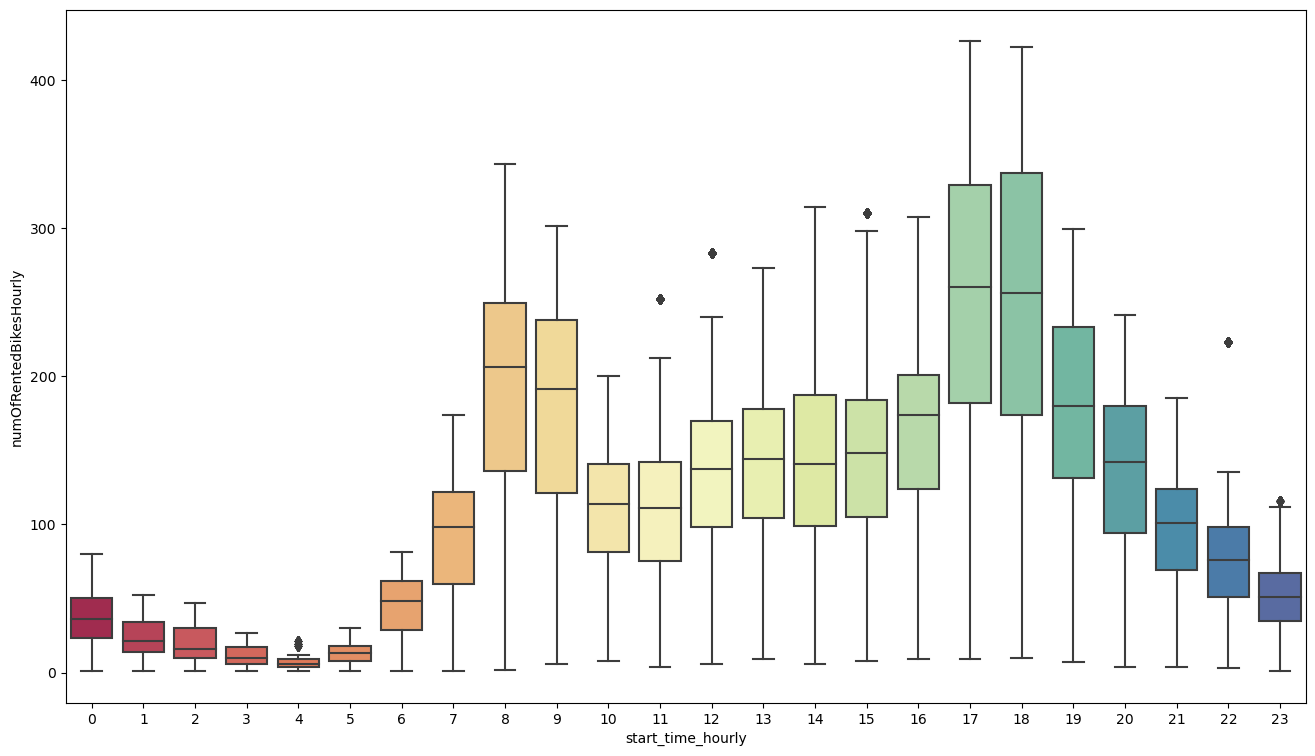

In [6]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Tagsüber () wird mehr ausgeliehen, als Nachts ()
- 17-18 und 8-9 scheint was zu sein, vlt. Berufsverkehr? Wir werden uns das anscvhauen :D

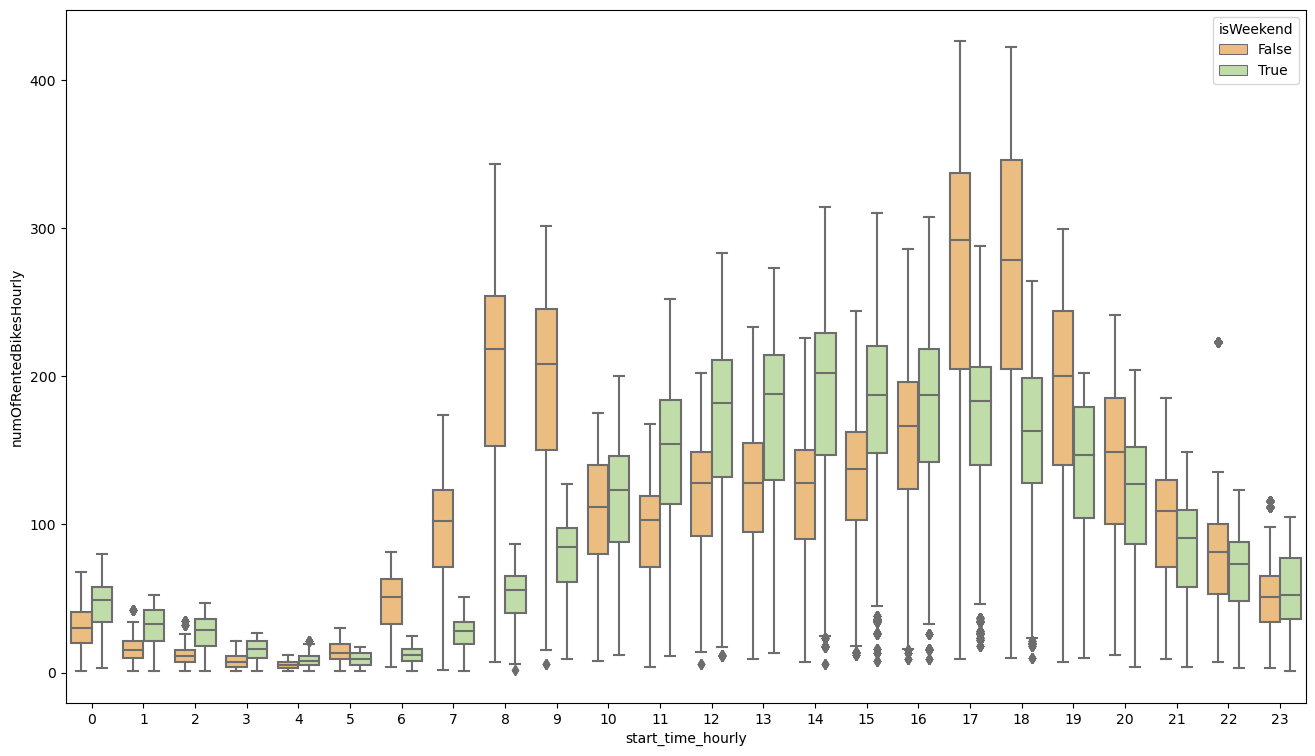

In [7]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isWeekend")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- In this graph we observe a rise in Fahradleih zum Berufsverkehr (isWeekend = False) zu den Zeiten 6,7,8,9,17,18
- Am Wochenende (isWeekend = True) ist generell am Tag 11 bis 16/17 Uhr mehr verleih (Mehr Freizeit)
- Partyfahrer Nachts am Wochende?? -> Next plot

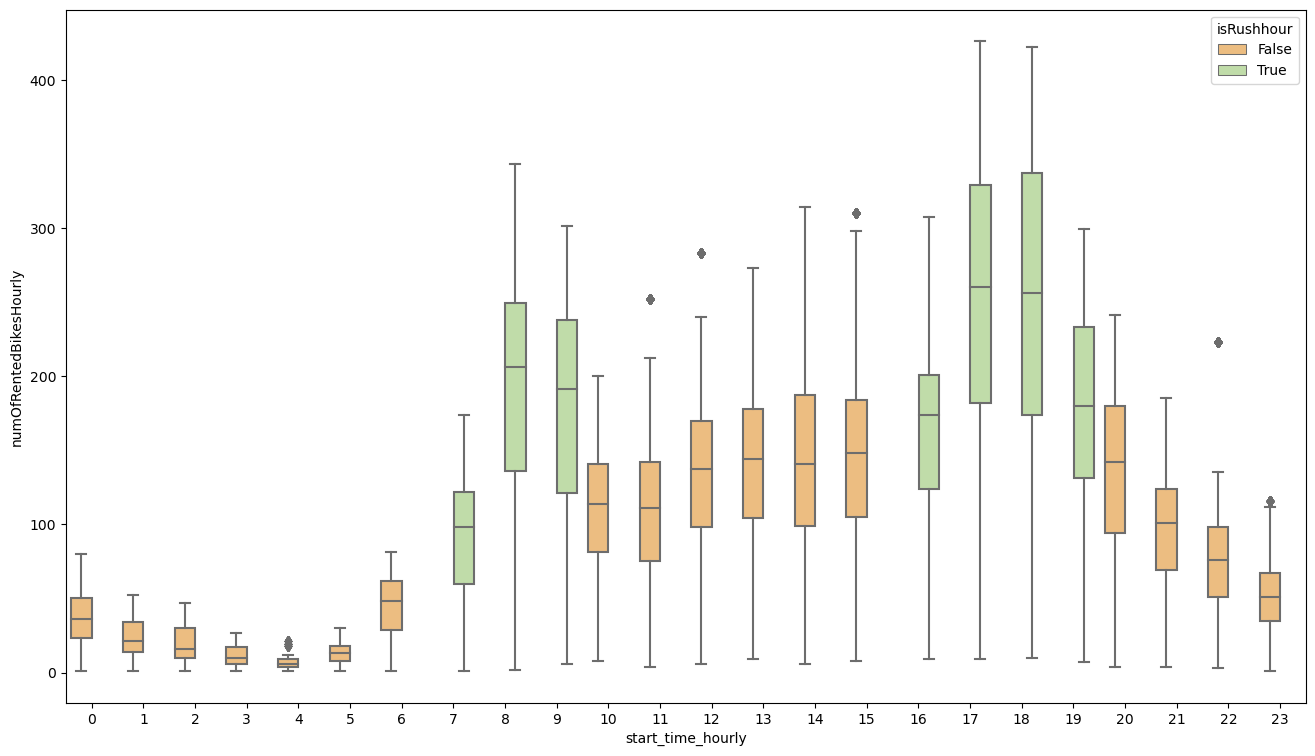

In [8]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isRushhour")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

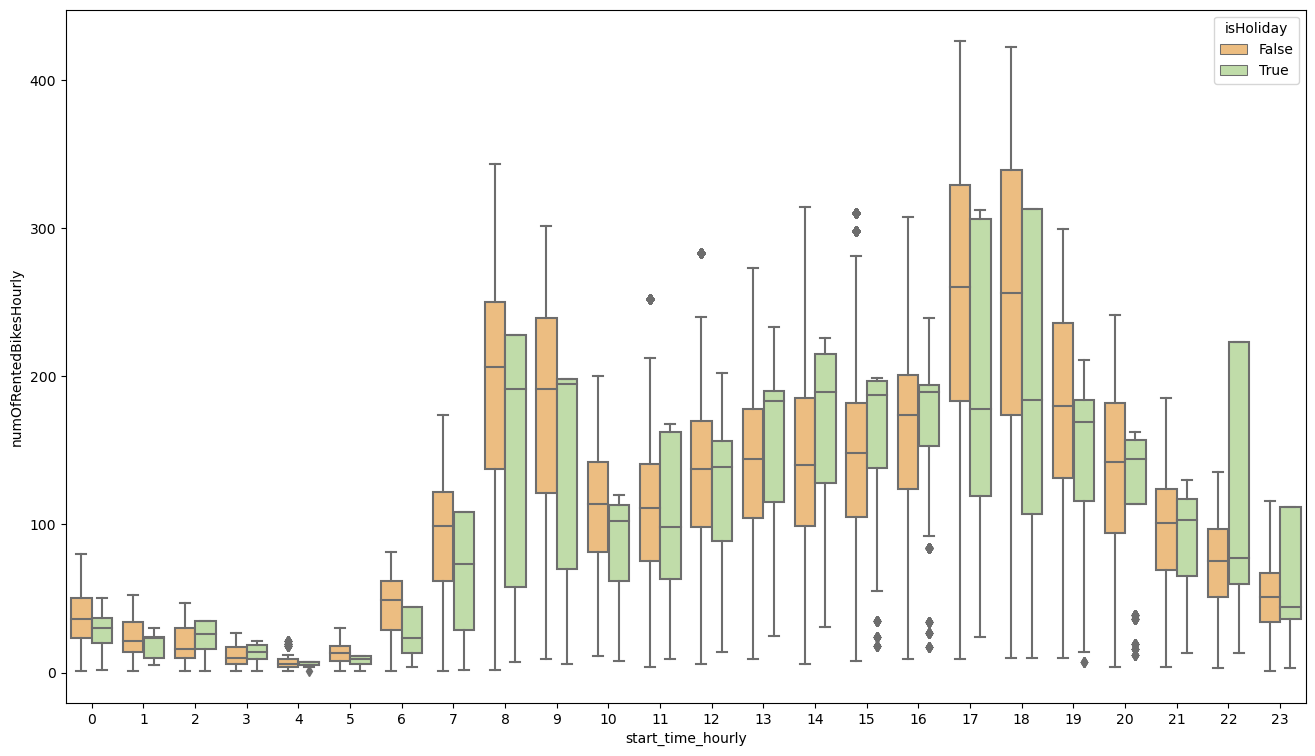

In [9]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG AUCH FÜR Warum keine Unterschiede

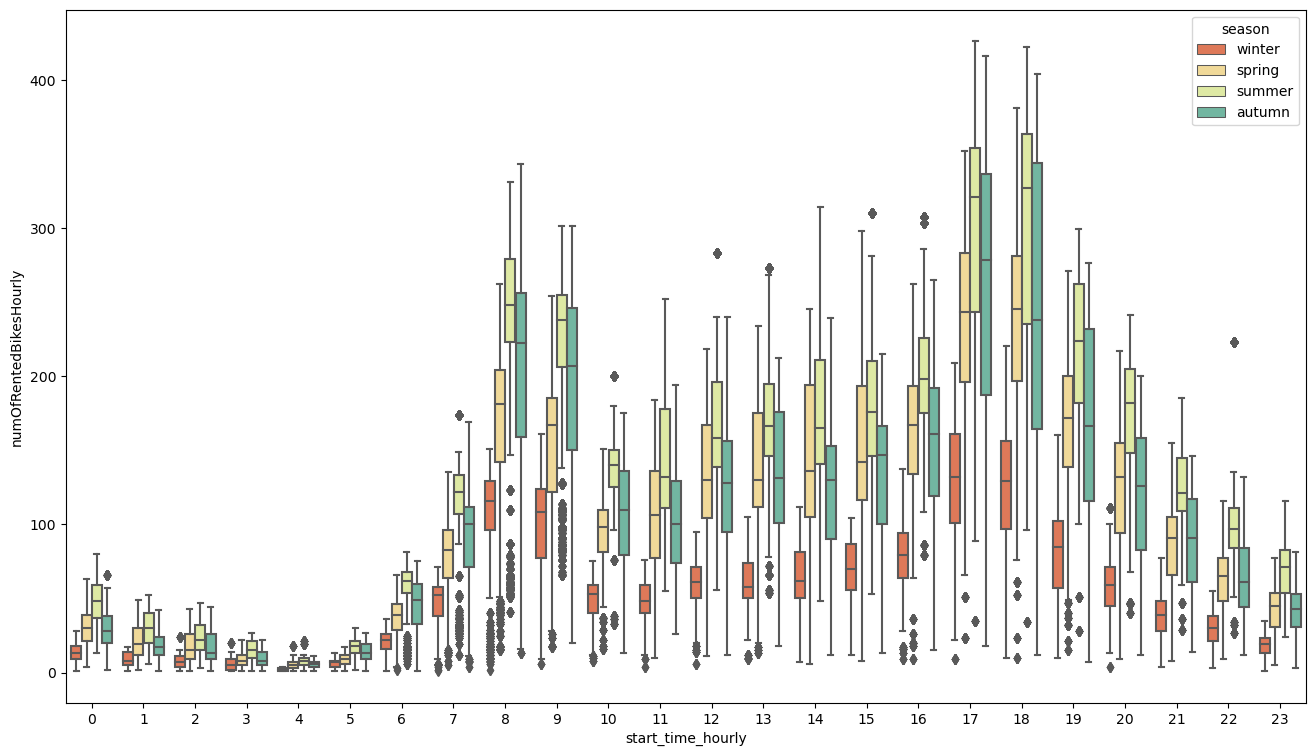

In [10]:
###### vielleicht Linien über mean
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="season")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Nutzung ist über seasons über UHrzeit gleich, aber weniger im Winter

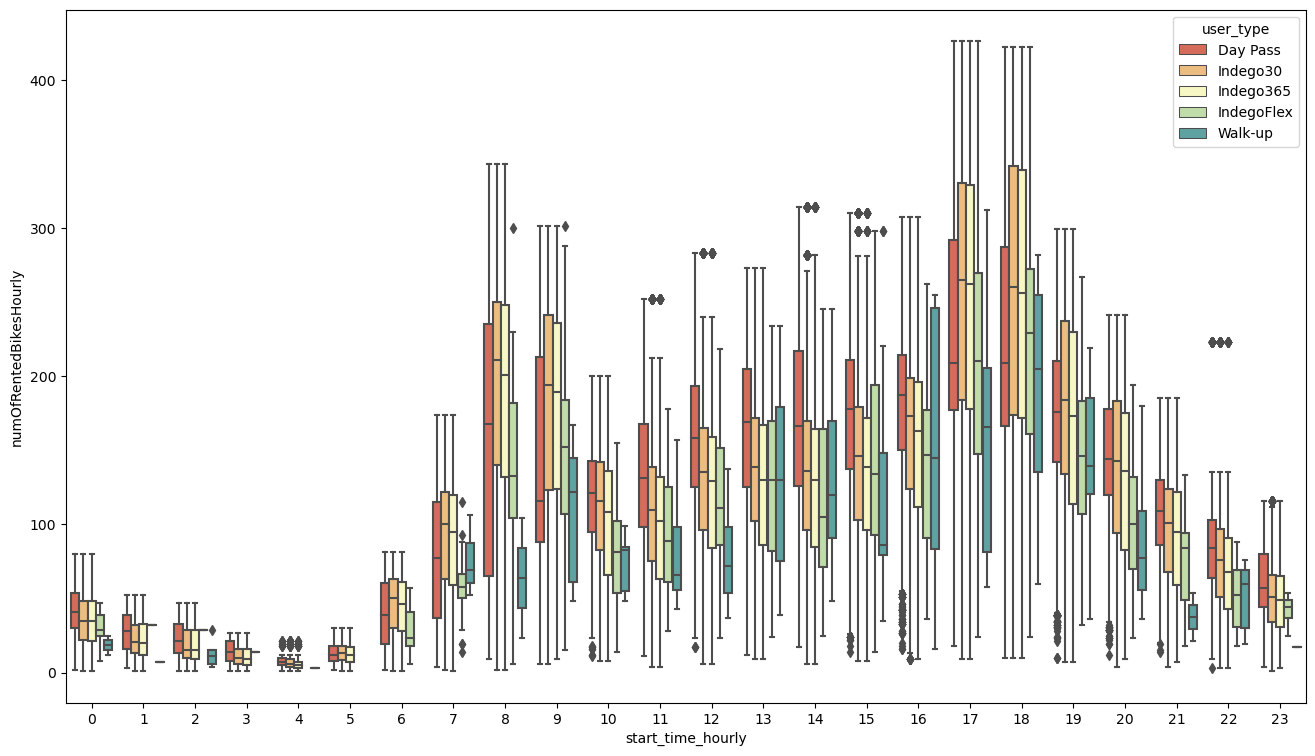

In [11]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="user_type", hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

Tarife erklären, z.b. Day Ticket um 8, weil Bahn weg

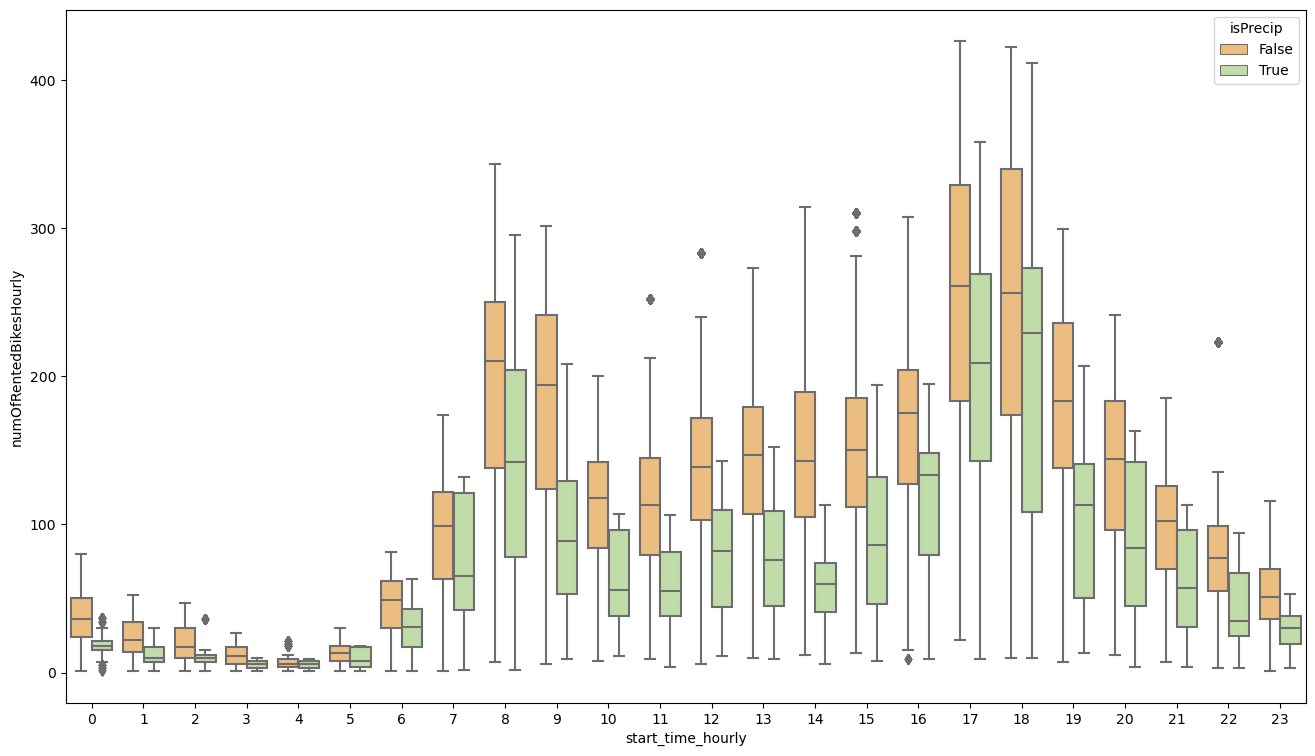

In [12]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isPrecip")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG

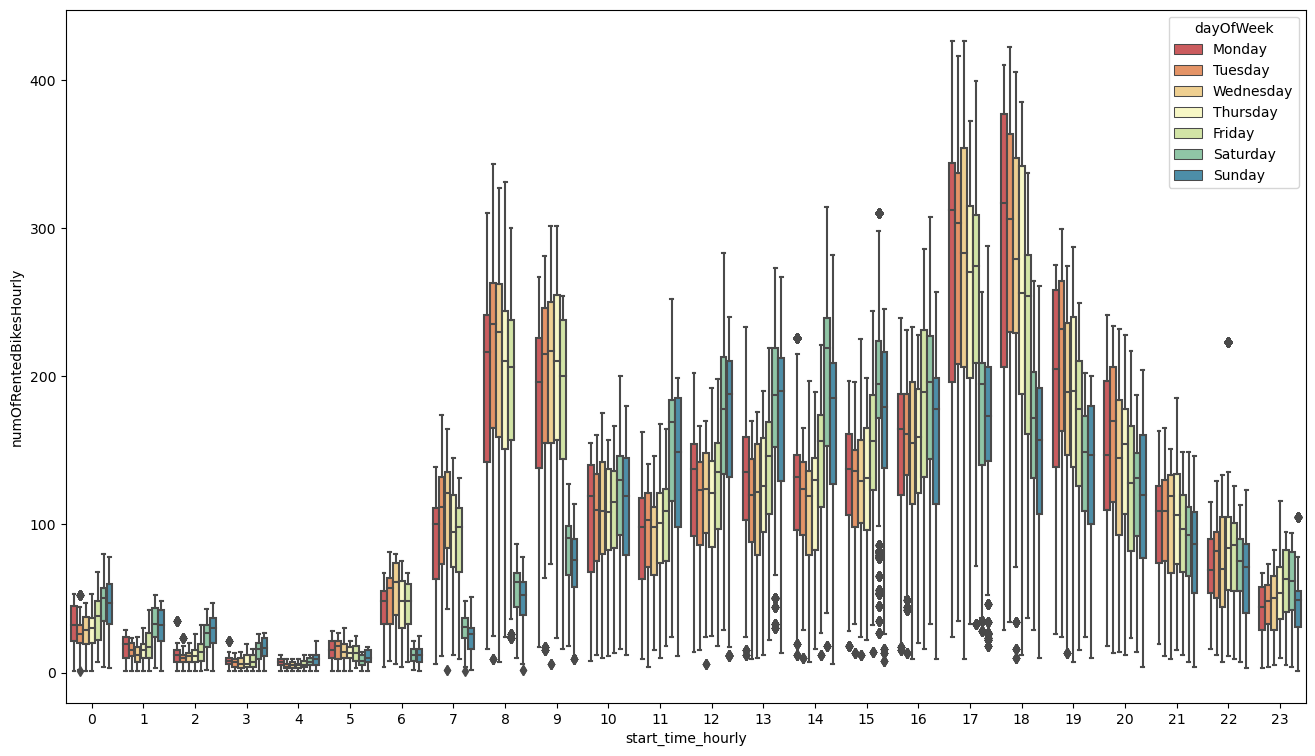

In [13]:
### ALS ÜBERSICHTLICHEN ABSCHLUSS + Überleitung zu Week
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

NETTER TEXT

### 2.1.2 Fleet usage variety per week

In [14]:
# initialize new target_value y="numOfRentedBikesDaily"

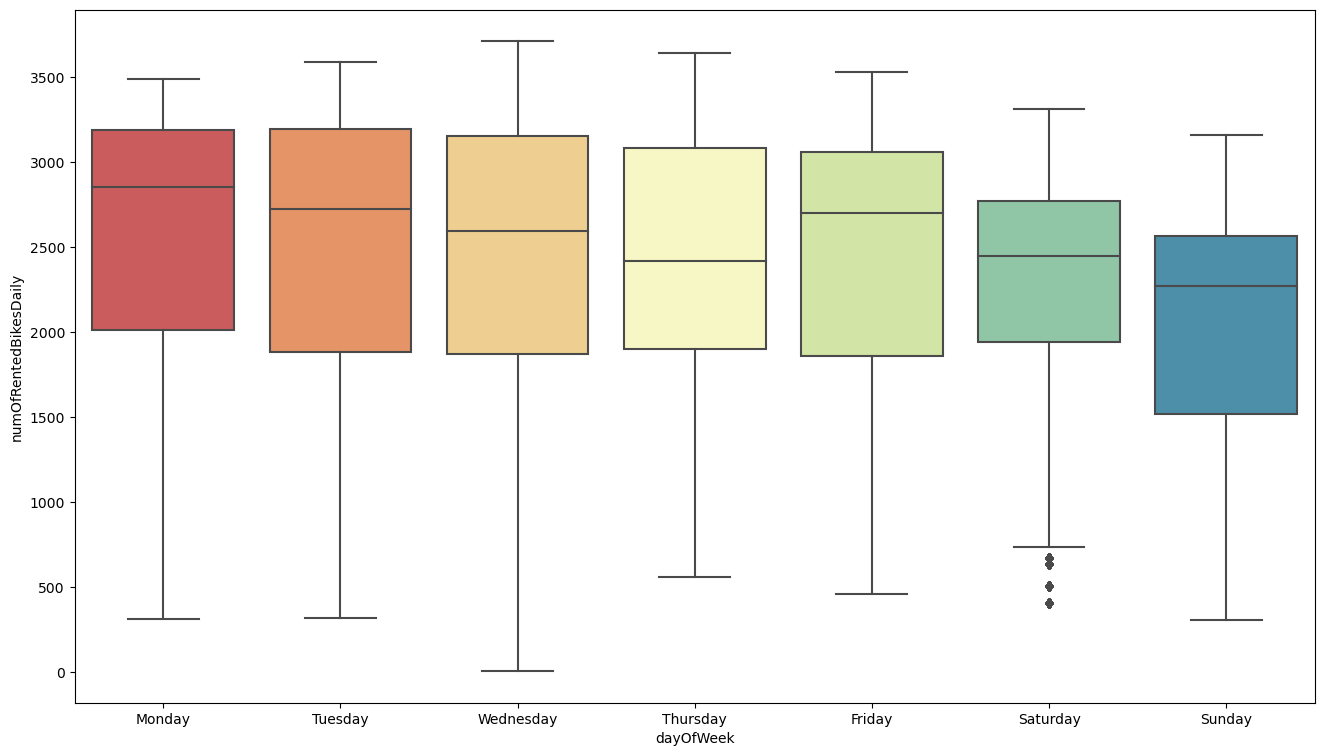

In [15]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- liegt vlt. am Abomodell

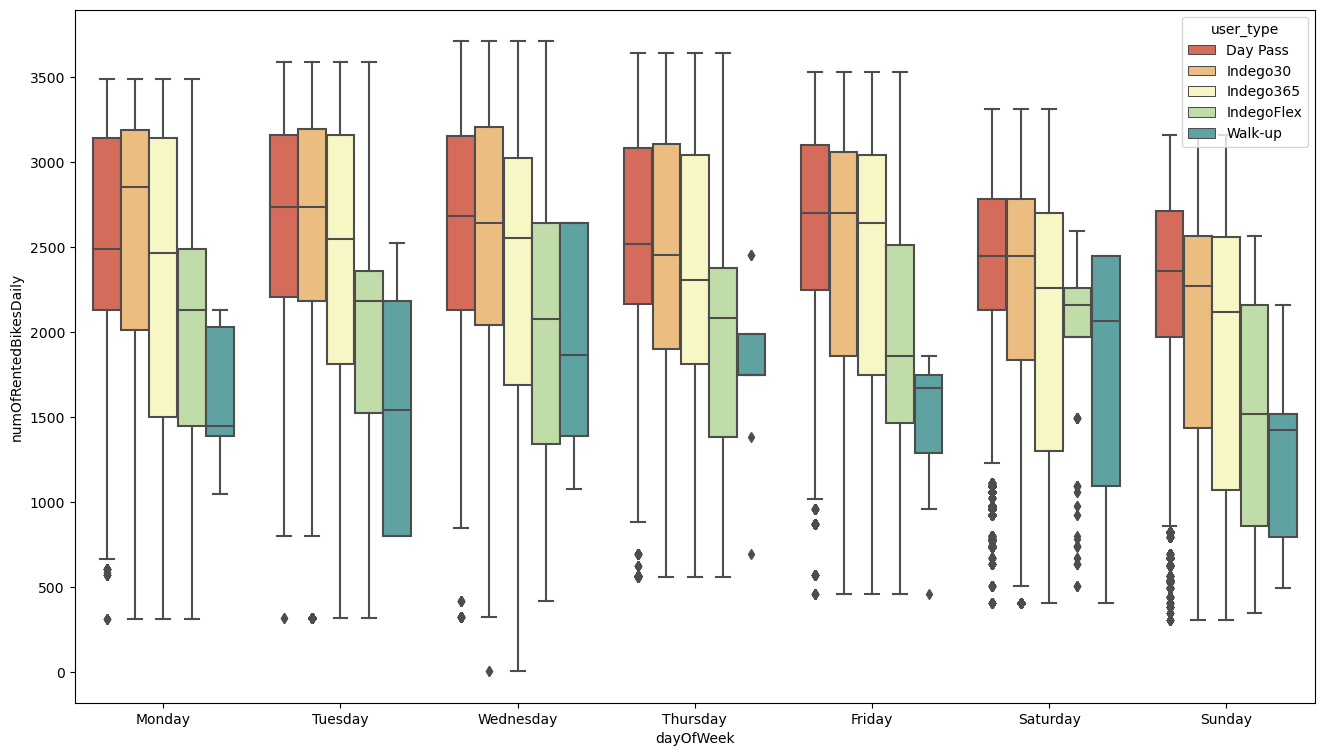

In [16]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="user_type",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

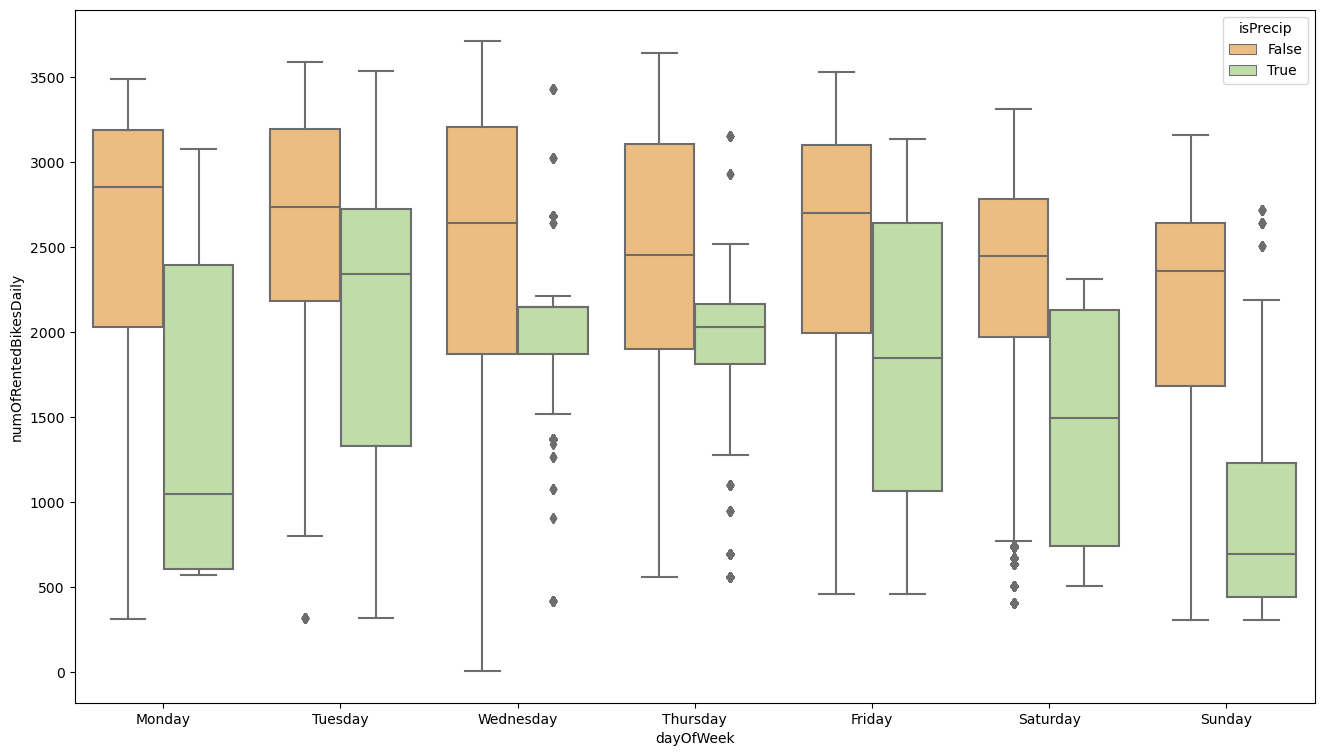

In [17]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="isPrecip",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [18]:
#SHOWOFF ORDER
#sns.boxplot(x="start_time_hourly",y="numOfRentedBikes",data=dfPhiladelphia,palette=palette,order=[22,23,0,1,2,3,4,5,6],hue="isWeekend")
#fig = plt.gcf()
#fig.set_size_inches(16, 9)
#plt.show()

### 2.1.2 Fleet usage variety during the year

In [19]:
dfPhiladelphia

,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,bike_id,start_latitude,start_longitude,end_latitude,...,isRushhour,tripduration_sec,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,start_week,start_month,start_station_name,end_station_name
0,2019-01-01,2019-01-01,0,0,3049,3007,14495,39.94509,-75.142500,39.945170,...,False,480,2,797,7932,29696,1,1,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01,2019-01-01,0,1,3005,3007,5332,39.94733,-75.144030,39.945170,...,False,420,2,797,7932,29696,1,1,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01,2019-01-01,1,1,3166,3169,14623,39.97195,-75.134450,39.953820,...,False,780,8,797,7932,29696,1,1,Frankford & Belgrade,2nd & Race
3,2019-01-01,2019-01-01,1,1,3058,3103,11706,39.96716,-75.170010,39.977139,...,False,540,8,797,7932,29696,1,1,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01,2019-01-01,1,1,3182,3028,11039,39.95081,-75.169530,39.940610,...,False,720,8,797,7932,29696,1,1,17th & Sansom,4th & Bainbridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733436,2019-12-31,2020-01-01,23,0,3192,3070,16508,39.96207,-75.141113,39.960620,...,False,2778,28,1189,7932,32990,1,12,2nd & Fairmount,"Spring Garden Station, MFL"
733437,2019-12-31,2020-01-01,23,0,3086,3025,3326,39.94019,-75.166910,39.937240,...,False,227,28,1189,7932,32990,1,12,Broad & Christian,11th & Washington
733438,2020-01-01,2020-01-01,0,0,3052,3068,14555,39.94732,-75.156950,39.935490,...,False,449,3,3,7932,29696,1,1,9th & Locust,Broad & Federal
733439,2020-01-01,2020-01-01,0,0,3182,3028,17805,39.95081,-75.169530,39.940610,...,False,527,3,3,7932,29696,1,1,17th & Sansom,4th & Bainbridge


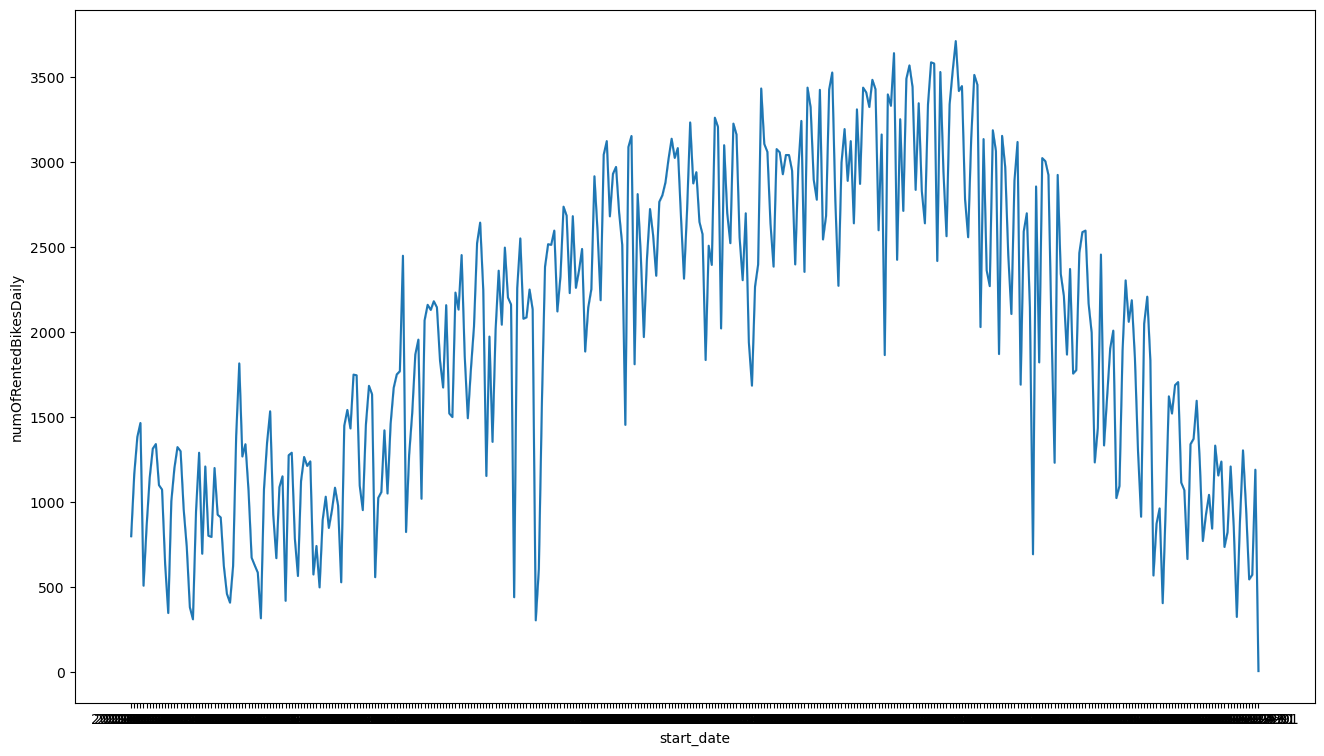

In [20]:
sns.lineplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

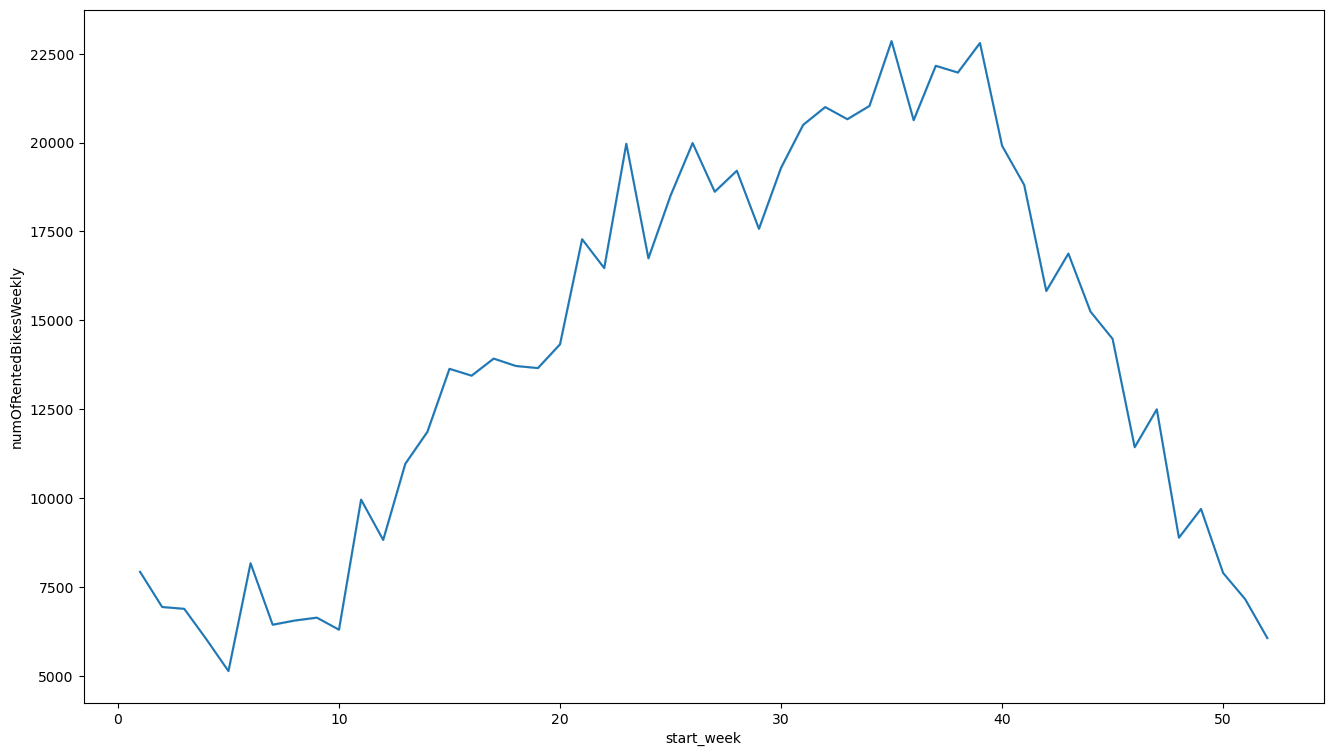

In [21]:
sns.lineplot(x="start_week",y="numOfRentedBikesWeekly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

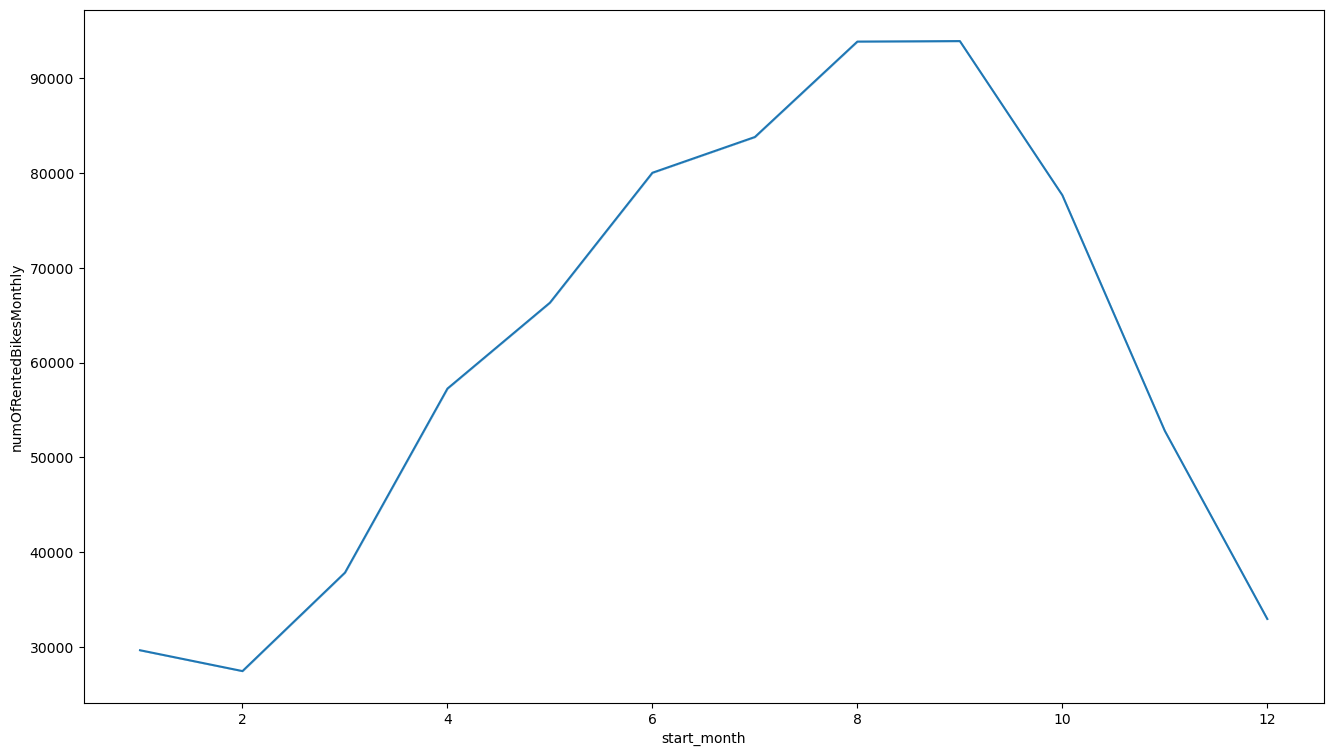

In [22]:
sns.lineplot(x="start_month",y="numOfRentedBikesMonthly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

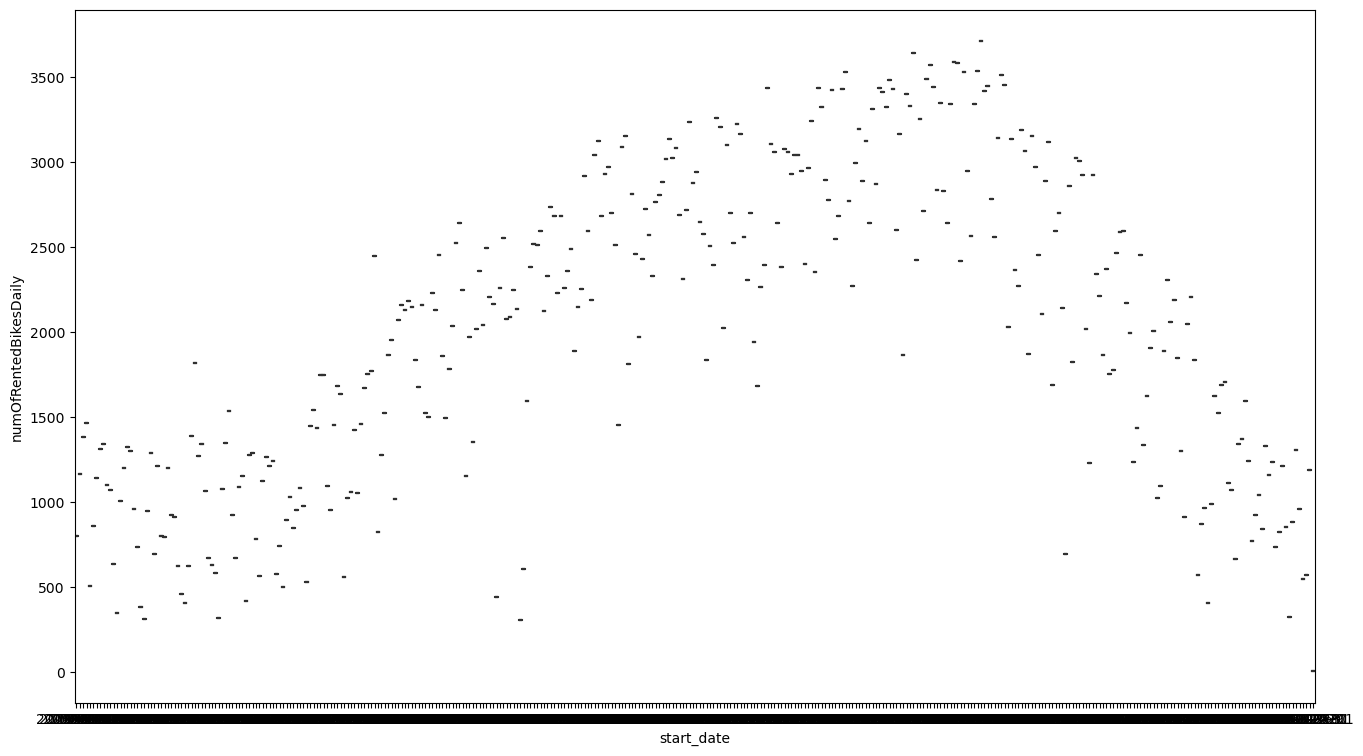

In [23]:
sns.boxplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [24]:
# Temperaturschwankungen & Bike usage

<AxesSubplot:xlabel='min_temp', ylabel='numOfRentedBikesDaily'>

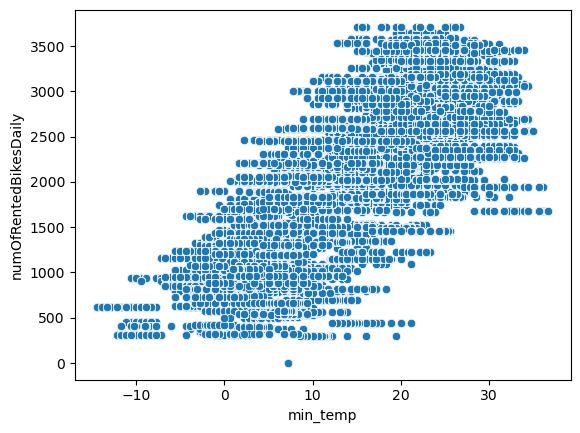

In [25]:
sns.scatterplot(x="min_temp",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)

## 2.2 Geographical Demand Patterns

In this section, we will:
- Which stations are particularly popular and which are not? 
- Provide a rationale as to why you observe these patterns.

### 2.2.1 Preparing Data

#### 2.2.1.1 Prepare Dataframe for All Station Locations

In [26]:
# definition to merge the latitude & longitude coordinates for one station in a single column
def mergeStartLocation(row):
    return (row["start_latitude"], row["start_longitude"])

def mergeEndLocation(row):
    return (row["end_latitude"],row["end_longitude"])

In [27]:
# dataframe with all unique stations and their coordinates
station_startLocations = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'start_station_name', 'start_latitude', 'start_longitude'])
station_startLocations['startLocation'] = station_startLocations.apply(lambda row: mergeStartLocation(row), axis=1)
station_startLocations.drop_duplicates(inplace=True)
station_startLocations.sort_values(by=['start_station_id'], inplace=True)
station_startLocations.reset_index(drop=True, inplace=True)

# dataframe with all unique stations and their coordinates
station_endLocations = pd.DataFrame(dfPhiladelphia, columns=['end_station_id', 'end_station_name', 'end_latitude', 'end_longitude'])
station_endLocations['endLocation'] = station_endLocations.apply(lambda row: mergeEndLocation(row), axis=1)
station_endLocations.drop_duplicates(inplace=True)
station_endLocations.sort_values(by=['end_station_id'], inplace=True)
station_endLocations.reset_index(drop=True, inplace=True)

# test whether the start & end locations are the same 
if(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id'])):
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": The dataframes for start & end locations are equeal and thereore the end locations can be neglected.")
else:
    print(station_startLocations['start_station_id'].equals(station_endLocations['end_station_id']), 
          ": Both Dataframes include different stations IDs and must be merged.")

True : The dataframes for start & end locations are equeal and thereore the end locations can be neglected.


In [28]:
# rename dataframe for all locations and column "start station id"
station_locations = station_startLocations
station_locations.rename(columns={"start_station_id": "station_id"}, inplace = True)
station_locations.rename(columns={"start_station_name": "station_name"}, inplace = True)
station_locations.rename(columns={"start_latitude": "latitude"}, inplace = True)
station_locations.rename(columns={"start_longitude": "longitude"}, inplace = True)
station_locations.rename(columns={"startLocation": "location"}, inplace = True)

*Note:* The dataframe station_locations only includes stations which have entries in dfPhiladelphia which means only stations with bike trips are taken into account. Maybe import dfStations from Task 1. 

#### 2.2.1.2 Preparing and Computing the Least & Most Popular Start / End Stations

In [29]:
# create a copied dataframe to further work with it
dfPhiladelphia_copy = dfPhiladelphia

# Firstly compute the most popular start stations in descending order
# accumulate the start stations ids 
start_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['start_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
start_stations = start_stations.groupby(['start_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
start_stations = pd.merge(station_locations, start_stations, left_on="station_id", right_on="start_station_id", how="left")

# drop unneccessary column "start_station_id"
start_stations.drop(columns="start_station_id", inplace=True)

# sort in descending order
start_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
start_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_start"}, inplace = True)

,station_id,station_name,latitude,longitude,location,numOfRentedBikes_start
0,3036,2nd & Germantown,39.968441,-75.140007,"(39.968441, -75.140007)",10
1,3042,3042,39.949421,-75.166130,"(39.949421, -75.16613)",20
2,3105,Penn Treaty Park,39.966518,-75.129959,"(39.966518, -75.129959)",21
3,3095,29th & Diamond,39.987709,-75.180519,"(39.987709, -75.180519)",101
4,3205,17th & JFK,39.954050,-75.167830,"(39.95405, -75.16783)",123
...,...,...,...,...,...,...
142,3057,Philadelphia Museum of Art,39.964390,-75.179870,"(39.96439, -75.17987)",11736
143,3190,17th & Locust,39.948920,-75.169910,"(39.94892, -75.16991)",12728
144,3045,13th & Locust,39.947920,-75.162370,"(39.94792, -75.16237)",13115
145,3054,Rodin Museum,39.962500,-75.174200,"(39.9625, -75.1742)",14341


In [30]:
# secondly compute the most popular end stations in descending order
# accumulate the start stations ids 
end_stations = pd.DataFrame(dfPhiladelphia_copy, columns=['end_station_id', 'numOfRentedBikes']).fillna(1)

# count trips for every start station
end_stations = end_stations.groupby(['end_station_id'])['numOfRentedBikes'].count().reset_index()

# merge with station_location dataframe to enrich data with combined coordinates
end_stations = pd.merge(station_locations, end_stations, left_on="station_id", right_on="end_station_id", how="left")

# drop unneccessary column "start_station_id"
end_stations.drop(columns="end_station_id", inplace=True)

# sort in descending order
end_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
end_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_end"}, inplace = True)

,station_id,station_name,latitude,longitude,location,numOfRentedBikes_end
0,3036,2nd & Germantown,39.968441,-75.140007,"(39.968441, -75.140007)",9
1,3105,Penn Treaty Park,39.966518,-75.129959,"(39.966518, -75.129959)",17
2,3042,3042,39.949421,-75.166130,"(39.949421, -75.16613)",22
3,3095,29th & Diamond,39.987709,-75.180519,"(39.987709, -75.180519)",76
4,3205,17th & JFK,39.954050,-75.167830,"(39.95405, -75.16783)",147
...,...,...,...,...,...,...
142,3032,23rd & South,39.945270,-75.179710,"(39.94527, -75.17971)",12184
143,3190,17th & Locust,39.948920,-75.169910,"(39.94892, -75.16991)",12923
144,3045,13th & Locust,39.947920,-75.162370,"(39.94792, -75.16237)",13113
145,3054,Rodin Museum,39.962500,-75.174200,"(39.9625, -75.1742)",14349


In [33]:
# Method for retrieving the top x interaction stations
# Compute sum of start and end, append all values of ending rentals to starting rentals 
# and then group by the station name and sum the counter values. Then sort and take the first x values.

# merge
combined_stations = pd.merge(start_stations, end_stations, left_on="station_id", right_on="station_id", how="left")

# rename columns
combined_stations.rename(columns={"station_name_x": "station_name"}, inplace = True)
combined_stations.rename(columns={"latitude_x": "latitude"}, inplace = True)
combined_stations.rename(columns={"longitude_x": "longitude"}, inplace = True)
combined_stations.rename(columns={"location_x": "location"}, inplace = True)

# add the number of rented bikes for each station 
combined_stations["numOfRentedBikes"] = combined_stations['numOfRentedBikes_start'] + combined_stations['numOfRentedBikes_end']

# drop unneccessary column 
combined_stations.drop(columns=['station_name_y', 'latitude_y', 'longitude_y', 'location_y'], inplace=True)

# sort in descending order
combined_stations.sort_values(by=['numOfRentedBikes'], ascending=True, inplace=True, ignore_index=True)

# rename column
combined_stations.rename(columns={"numOfRentedBikes": "numOfRentedBikes_combined"}, inplace = True)

,station_id,station_name,latitude,longitude,location,numOfRentedBikes_start,numOfRentedBikes_end,numOfRentedBikes_combined
0,3036,2nd & Germantown,39.968441,-75.140007,"(39.968441, -75.140007)",10,9,19
1,3105,Penn Treaty Park,39.966518,-75.129959,"(39.966518, -75.129959)",21,17,38
2,3042,3042,39.949421,-75.166130,"(39.949421, -75.16613)",20,22,42
3,3095,29th & Diamond,39.987709,-75.180519,"(39.987709, -75.180519)",101,76,177
4,3205,17th & JFK,39.954050,-75.167830,"(39.95405, -75.16783)",123,147,270
...,...,...,...,...,...,...,...,...
142,3032,23rd & South,39.945270,-75.179710,"(39.94527, -75.17971)",11574,12184,23758
143,3190,17th & Locust,39.948920,-75.169910,"(39.94892, -75.16991)",12728,12923,25651
144,3045,13th & Locust,39.947920,-75.162370,"(39.94792, -75.16237)",13115,13113,26228
145,3054,Rodin Museum,39.962500,-75.174200,"(39.9625, -75.1742)",14341,14349,28690


### 2.2.2 Plot the Data for Least & Most Popular Stations

#### 2.2.2.1 Visualization of Data for the Most Popular Stations in Philadelphia

In [118]:
# prepare dataframe combined_stations for plotting
popularity_stations = pd.DataFrame(combined_stations, columns=['station_name', 'numOfRentedBikes_start', 'numOfRentedBikes_end', 'numOfRentedBikes_combined'])

# set index to station name 
popularity_stations.set_index(['station_name'], inplace=True)

# Method to Plot the data
def plot_popularity_stations(popularity, x):
    if popularity == 'most popular':
        ax = popularity_stations.tail(x).plot(kind="barh", figsize=(60,30), fontsize=30, width=0.7)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' most popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    elif popularity == 'least popular':
        ax = popularity_stations.head(x).plot(kind="barh", figsize=(60,30), fontsize=30, width=0.7)
        ax.set_xlabel('Number of rented bikes', fontsize=60)
        ax.set_ylabel('Station names', fontsize = 60)
        ax.set_title(label= str(x) + ' least popular starting stations', fontsize = 80)
        ax.legend(fontsize = 40)
    else:
        ax = 'Please define the popularity with either "most popular" or "least popular".'
    return ax

<AxesSubplot:title={'center':'20 most popular starting stations'}, xlabel='Number of rented bikes', ylabel='Station names'>

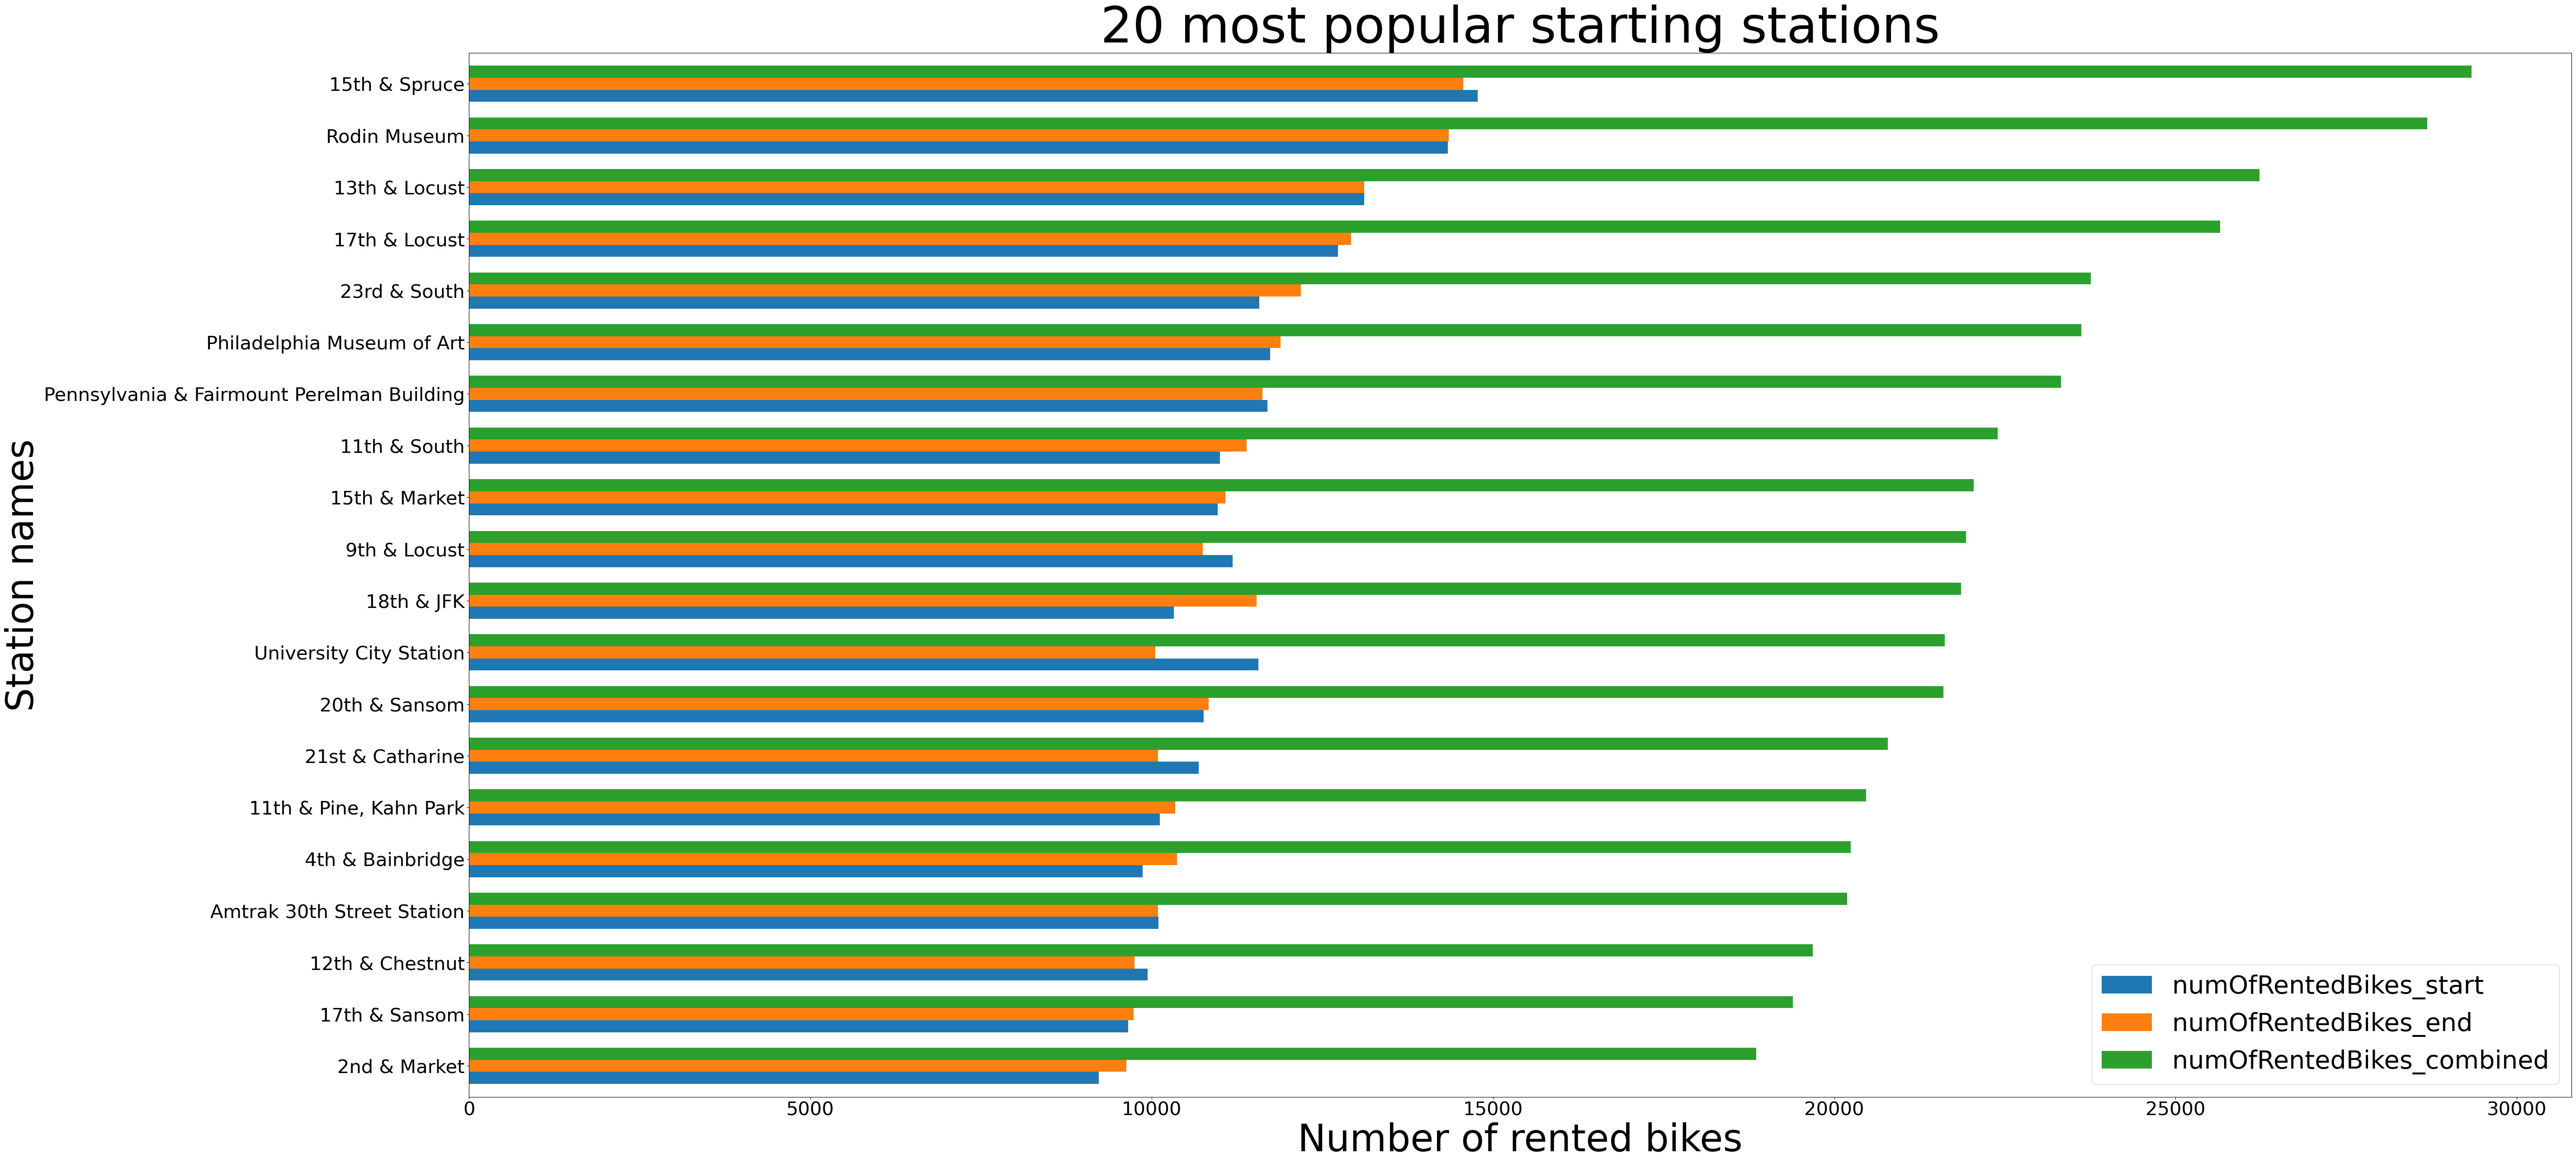

In [119]:
plot_popularity_stations('most popular', 20)

#### 2.2.2.2 Visualization of Data for the Least Popular Stations in Philadelphia

<AxesSubplot:title={'center':'20 least popular starting stations'}, xlabel='Number of rented bikes', ylabel='Station names'>

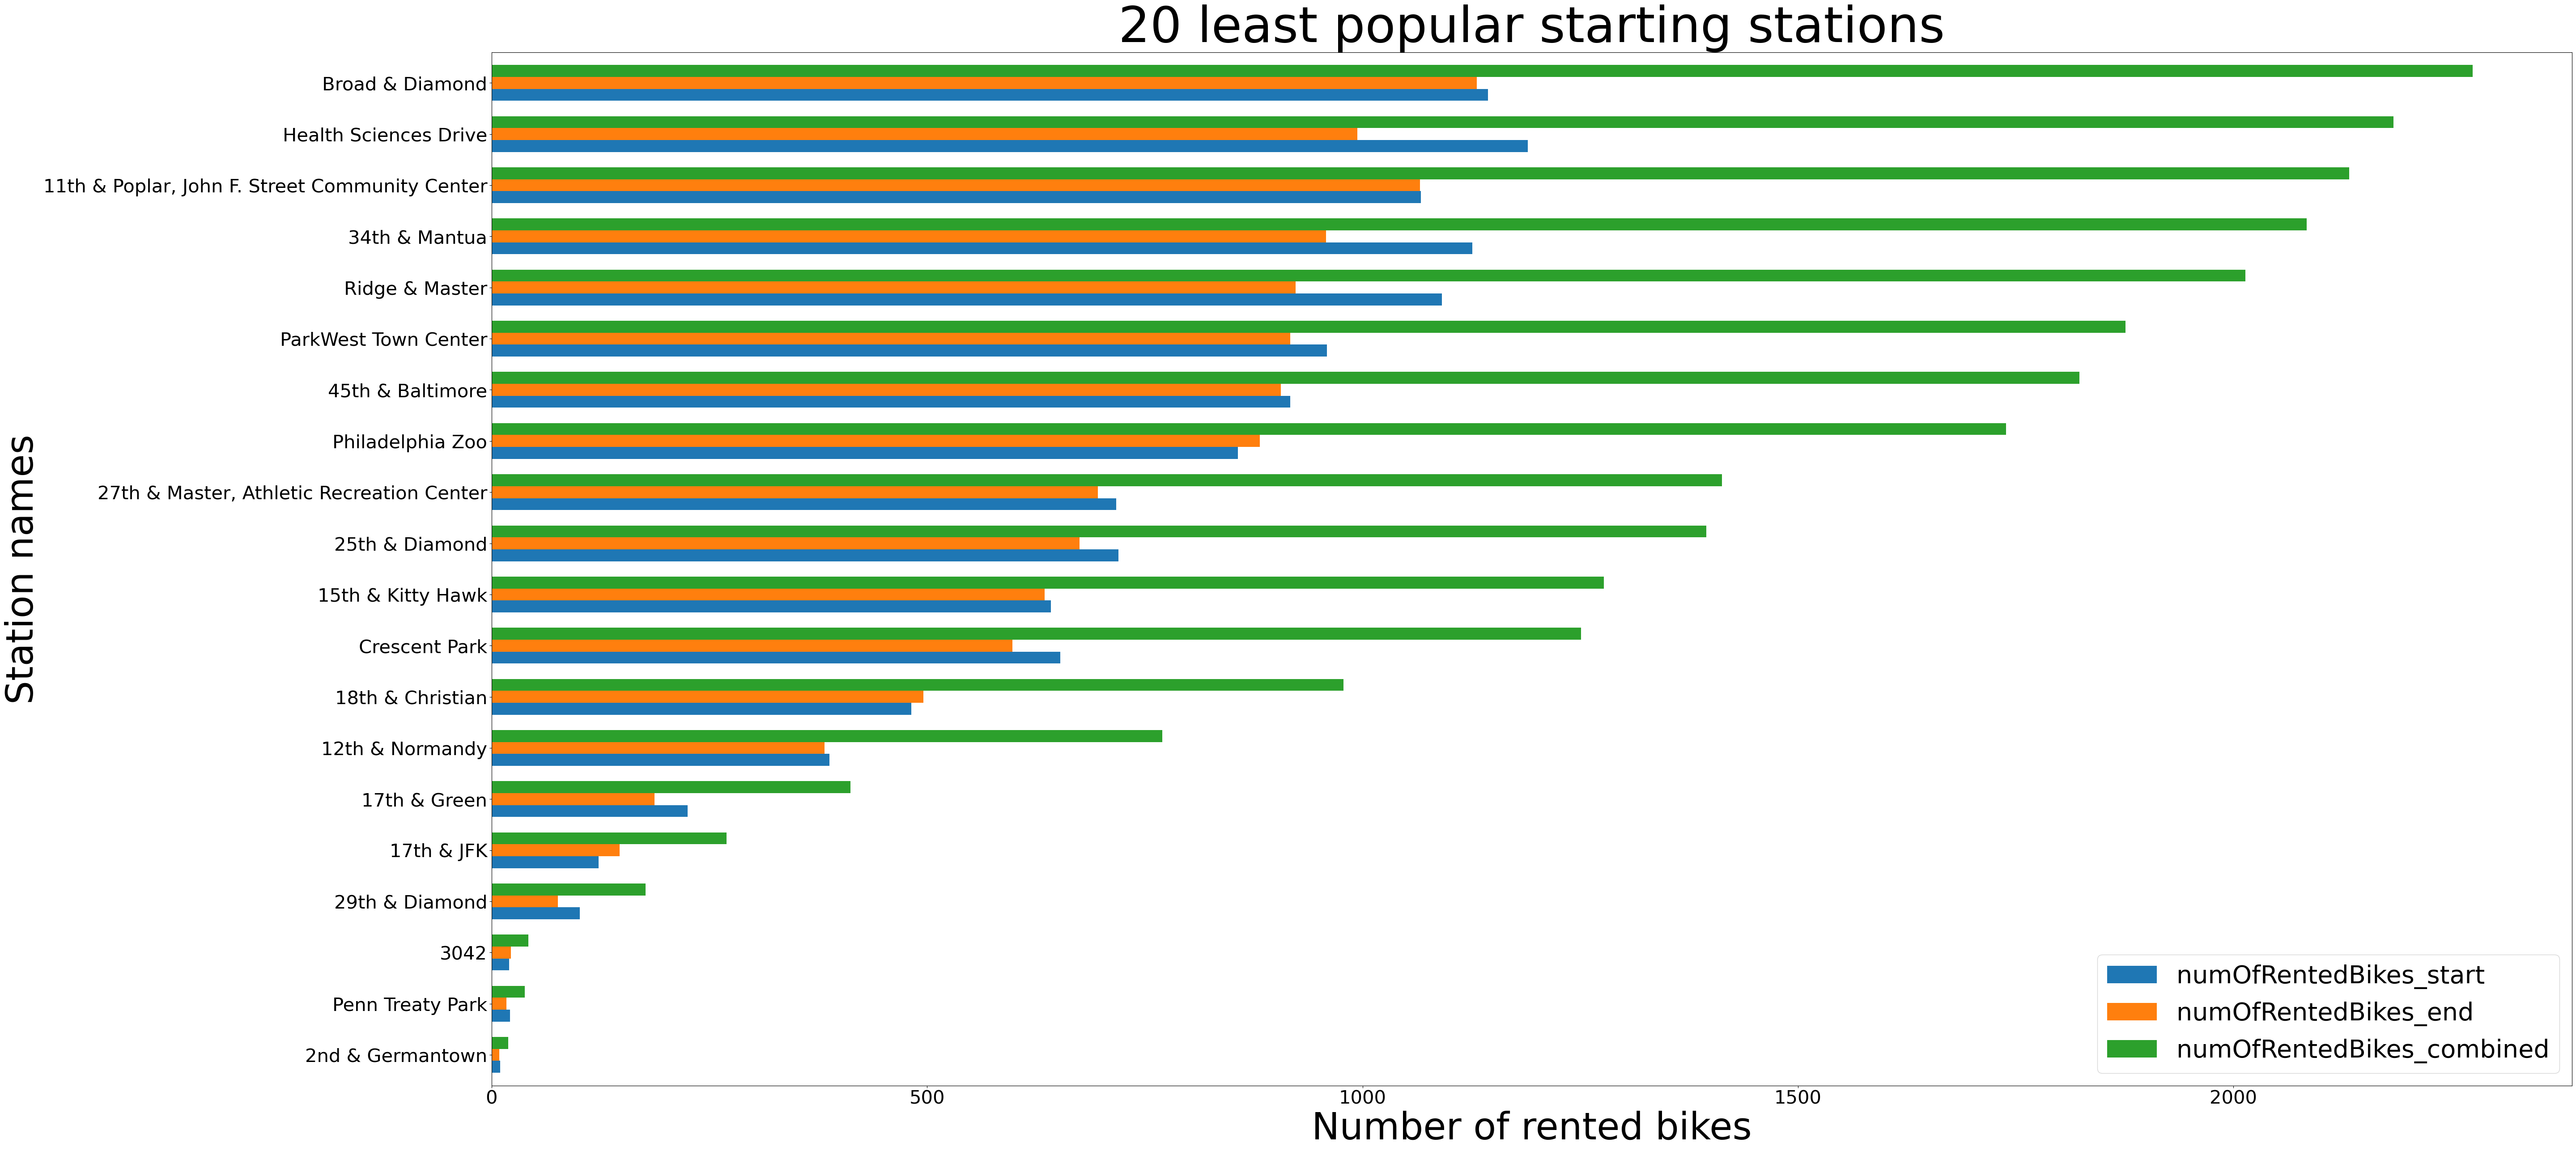

In [120]:
plot_popularity_stations('least popular', 20)

#### 2.2.2.3 Distribution of Interactions between Stations

#### 2.2.2.4 Patterns from Data

### 2.2.3 Geographical Visualization of Location Data

### 2.2.4 Summary and Heatmap

In [ ]:
locationFrame = pd.DataFrame(dfPhiladelphia, columns=['start_station_id', 'end_station_id', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])
locationFrame

In [ ]:
locationFrame['startLocation'] = locationFrame.apply(lambda row: mergeStartLocation(row), axis=1)
locationFrame['endLocation'] = locationFrame.apply(lambda row: mergeEndLocation(row), axis=1)

locationFrame

### 2.2.6 Heatmap 

#### Heatmap for departures

In [ ]:
# pip install folium

In [ ]:
# import folium for map creation
import folium
from folium import plugins
from folium.plugins import HeatMap

# Create a new map for Philadelphia
heatmap_departures = folium.Map(location=[locationFrame.start_latitude.mean(), locationFrame.start_longitude.mean()], zoom_start=13, control_scale = True)

# add a heatmap
heatmap_departures = heatmap_departures.add_child(plugins.HeatMap(locationFrame['startLocation'], zoom_start=13, radius=20))
heatmap_departures

### Adding circle around the city center of Philadelphia

In [ ]:
# coordinates for city center of Philadelphia 
city_center_philly = [39.9525839, -75.1652215]

# adding city center marker to display the exact location
folium.Marker(
          location=city_center_philly, popup="Philadelphia City Center", icon=folium.Icon(color="green"),
       ).add_to(heatmap_departures)

# adding a radius around the city center (hier vllt noch etwas wie mean zum city center einbringen)
folium.Circle(
    radius=1000,
    location=city_center_philly,
    color="crimson",
    fill=False,
).add_to(heatmap_departures)

# save to png (noch offen)

heatmap_departures

### Adding start station coordinate markers to heatmap

In [ ]:
# dataframe with all unique stations and their coordinates
station_startLocations = pd.DataFrame(locationFrame, columns=['start_station_id', 'startLocation'])
station_startLocations.drop_duplicates(inplace=True)
station_startLocations.reset_index(drop=True, inplace=True)

# accumulate the start stations ids 
start_stations = pd.DataFrame(locationFrame, columns=['start_station_id', 'numOfRentedBikes']).fillna(1)
start_stations = start_stations.groupby(['start_station_id'])['numOfRentedBikes'].count().reset_index()
start_stations.sort_values(by=['numOfRentedBikes'], ascending=False, inplace=True, ignore_index=True)

# merge
start_stations = pd.merge(start_stations, station_startLocations, left_on="start_station_id", right_on="start_station_id", how="left")
start_stations

#### Heatmap for Arrivals

In [ ]:
# Create a new heatmap for arrival locations in Philadelphia
heatmap_arrivals = folium.Map(location=[locationFrame.start_latitude.mean(), locationFrame.start_longitude.mean()], zoom_start=13, control_scale = True)


# add a heatmap
heatmap_arrivals = heatmap_arrivals.add_child(plugins.HeatMap(locationFrame['endLocation'], zoom_start=13, radius=20))
#heatmap_arrivals

#### Adding end station markers to the heatmap

In [ ]:
# dataframe with all unique stations and their coordinates
station_endLocations = pd.DataFrame(locationFrame, columns=['end_station_id', 'endLocation'])
station_endLocations.drop_duplicates(inplace=True)
station_endLocations.reset_index(drop=True, inplace=True)

# accumulate the start stations ids 
end_stations = pd.DataFrame(locationFrame, columns=['end_station_id', 'numOfRentedBikes']).fillna(1)
end_stations = end_stations.groupby(['end_station_id'])['numOfRentedBikes'].count().reset_index()
end_stations.sort_values(by=['numOfRentedBikes'], ascending=False, inplace=True, ignore_index=True)

# merge
end_stations = pd.merge(end_stations, station_endLocations, left_on="end_station_id", right_on="end_station_id", how="left")
end_stations

In [ ]:
# add markers one by one on the map for the top 20
for i in range(0,14):
    s1 = "Station:"
    s2 = str(end_stations.iloc[i]['end_station_id'])
    s3 = "Bikes:"
    s4 = str(end_stations.iloc[i]['numOfRentedBikes'])
    station_info = s1 + " " + s2 + " " + s3 + " " + s4 
    folium.Marker(
          location=end_stations.iloc[i]['endLocation'], popup=station_info, icon=folium.Icon(color="green"),
       ).add_to(heatmap_arrivals)
    
# add markers one by one on the map for the top 20
for i in range(132,146):
    s1 = "Station:"
    s2 = str(end_stations.iloc[i]['end_station_id'])
    s3 = "Bikes:"
    s4 = str(end_stations.iloc[i]['numOfRentedBikes'])
    station_info = s1 + " " + s2 + " " + s3 + " " + s4 
    folium.Marker(
          location=end_stations.iloc[i]['endLocation'], popup=station_info,icon=folium.Icon(color="red"),
       ).add_to(heatmap_arrivals)

#heatmap_arrivals

## 2.3 Key Performance Indicators (KPIs)

In this section, we will:
- Define at least (!) three KPIs that you would include in a dashboard for a fleet operators. These KPIs must provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of **utilization**, **revenue**, **coverage** and/or **other business-related aspects**. 
- Briefly explain the rationale behind selecting each KPI, explain why you have chosen it and where needed provide references.
- Calculate hourly values for the selected
- KPIs for the city/year in your dataset and visualize them over time. Which trends do you observe? How do you explain them?

### 2.3.1 KPI: `Utilization`

### 2.3.2 KPI: `Revenue`

### 2.3.3 KPI: `Coverage`

### 2.3.4 KPI: `...`

### 2.3.5 KPI: `...`

### 2.3.6 Dashboard

In [ ]:
#sns.pairplot(tips, 
#             hue="sex", palette="magma",diag_kind ='kde', )
#plt.show()